In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
%pip install diffractsim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


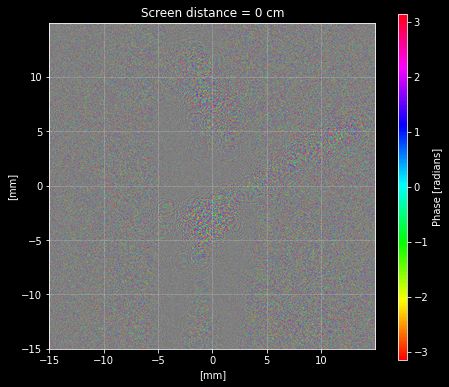

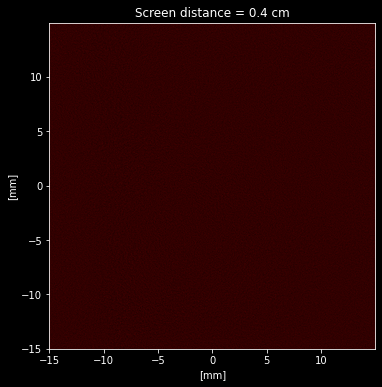

In [44]:
import diffractsim
diffractsim.set_backend("CPU")

from diffractsim import MonochromaticField, mm, nm, cm, CustomPhaseRetrieval, ApertureFromImage


#Note: CustomPhaseRetrieval requires autograd which is not installed by default with diffractsim. 
# To install autograd, type: 'pip install autograd'


# Generate a 30cm plane phase hologram
distance = 40*cm
PR = CustomPhaseRetrieval(wavelength=633 * nm, z = distance, extent_x=30 * mm, extent_y=30 * mm, 
                          Nx=2048, Ny=2048)

nip_path = "/content/drive/MyDrive/digital_holography/NIP.bmp"
clock_path = "/content/drive/MyDrive/digital_holography/clock.bmp"
appled_path = "/content/drive/MyDrive/digital_holography/apple.bmp"
image_path = "/content/drive/MyDrive/digital_holography/image.jpg"
white_path = "/content/drive/MyDrive/digital_holography/white_background.png"


PR.set_source_amplitude(amplitude_mask_path= white_path, image_size=(30.0 * mm, 30.0 * mm))
PR.set_target_amplitude(amplitude_mask_path= image_path, image_size=(30.0 * mm, 30.0 * mm))



PR.retrieve_phase_mask(max_iter = 30, method = 'Adam-Optimizer')
PR.save_retrieved_phase_as_image('/content/drive/MyDrive/digital_holography/nip_phase_retrieved.png')




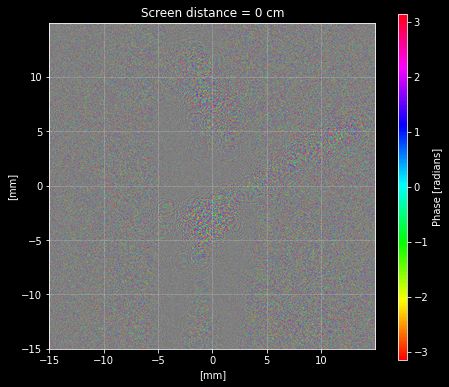

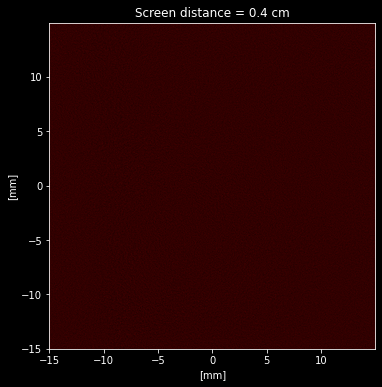

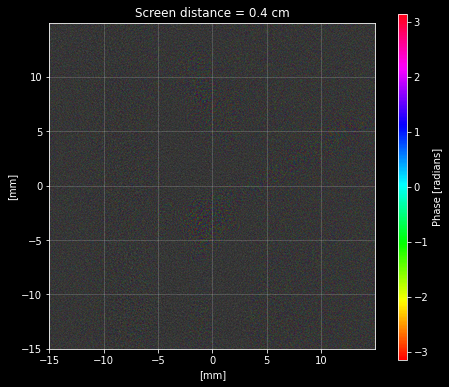

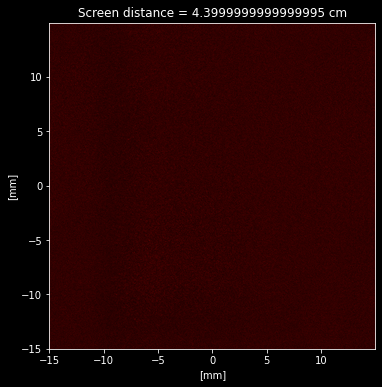

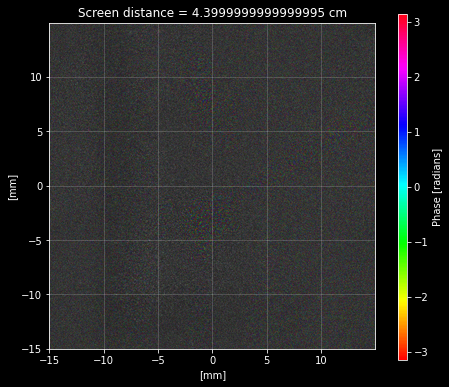

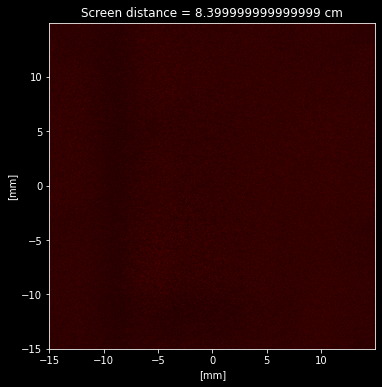

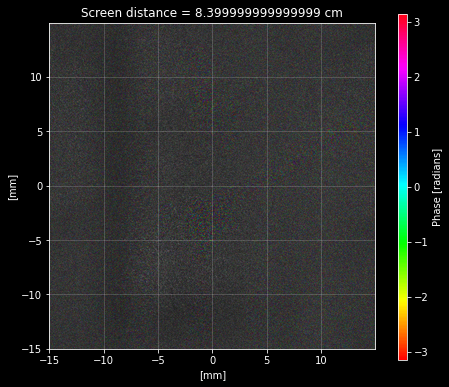

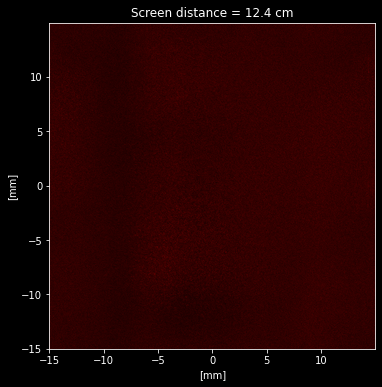

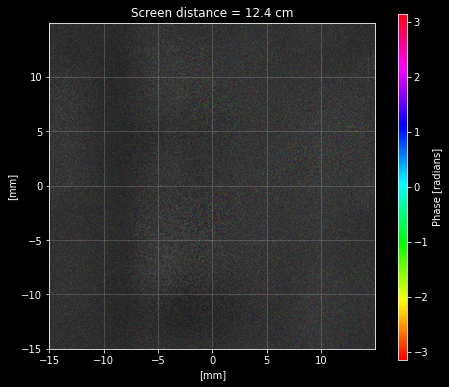

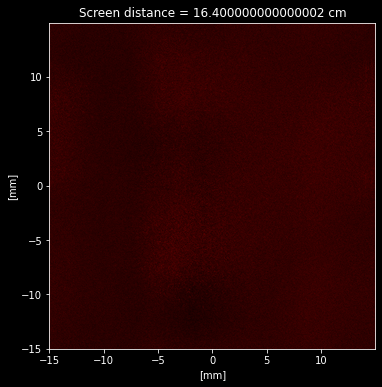

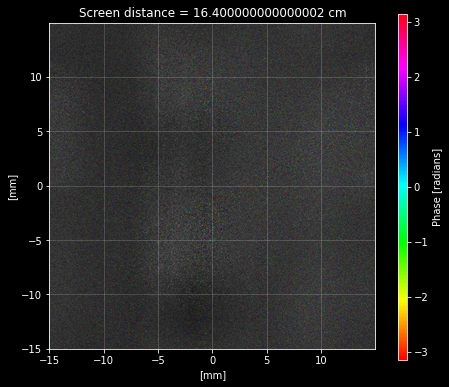

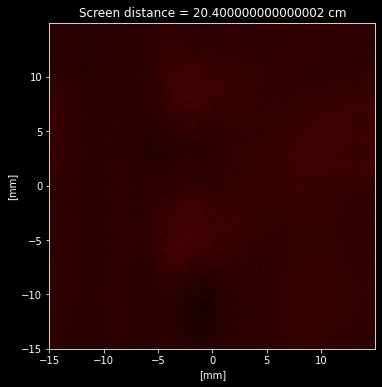

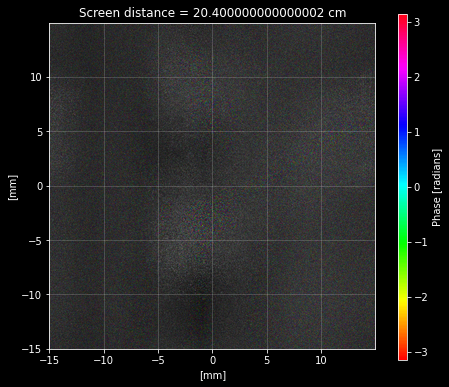

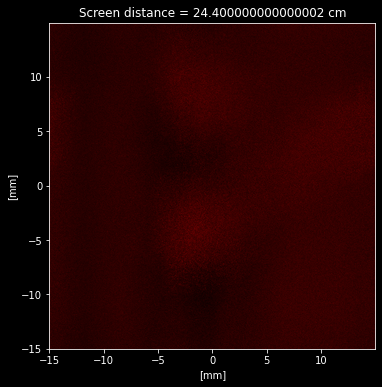

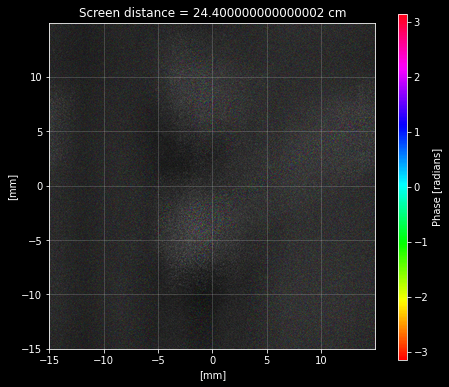

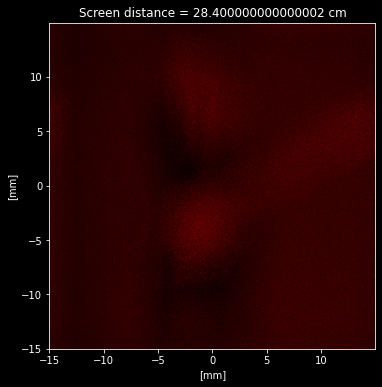

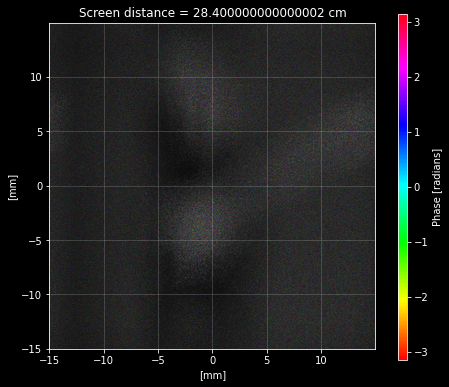

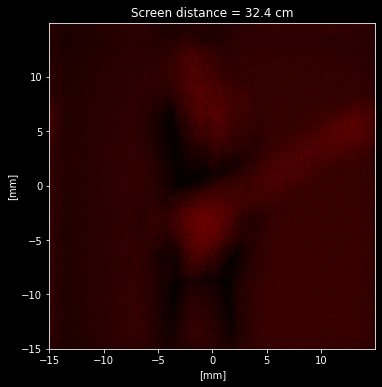

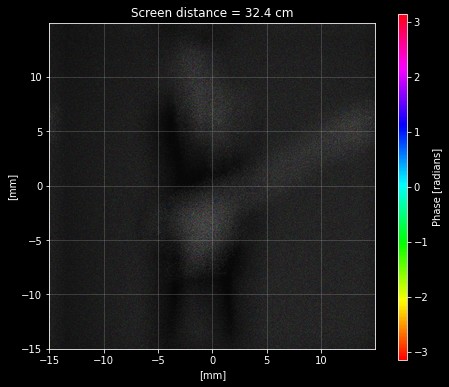

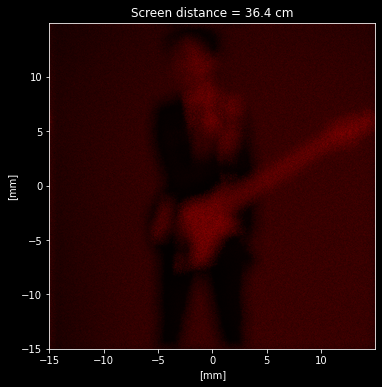

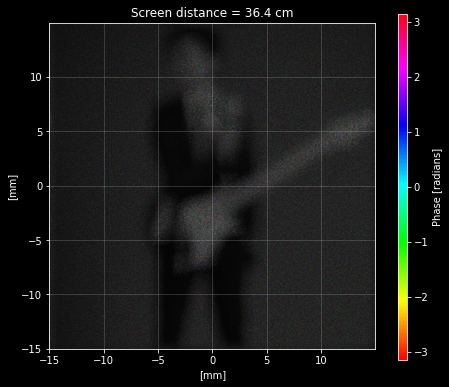

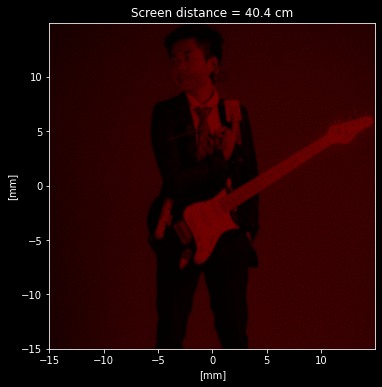

In [45]:

#Add a plane wave

F = MonochromaticField(
    wavelength=633 * nm, extent_x=30 * mm, extent_y=30 * mm, Nx=2048, Ny=2048, intensity = 0.001
)


F.add(ApertureFromImage(
     amplitude_mask_path= white_path, 
     image_size=(30.0    * mm, 30.0  * mm), simulation = F)
)



F.add(ApertureFromImage(
     phase_mask_path= "/content/drive/MyDrive/digital_holography/nip_phase_retrieved.png", 
     image_size=(30.0   * mm, 30.0 * mm), simulation = F)
)




E = F.get_field()
F.plot_phase(E, grid = True, units = mm)

# propagate field 30*cm
F.propagate(distance*cm)

# plot reconstructed image
rgb = F.get_colors()

#F.plot_colors(rgb, image_name = "1")
F.plot_colors(rgb)


n = 40
for i in range(2,(n+2), n//10):
    # plot phase at z = 0
    E = F.get_field()
    F.plot_phase(E, grid = True, units = mm)

    # propagate field 30*cm
    F.propagate((n//10)*cm)

    # plot reconstructed image
    rgb = F.get_colors()

    #F.plot_colors(rgb, image_name = "{}".format(i))
    F.plot_colors(rgb)